In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


In [5]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mise_df = pd.read_csv(mouse_drug_data_to_load)
mise_df.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
# Read the Clinical Trial Data
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
#Here I am checking that both the dataframes have the same units of observation
mise_df_ids = mise_df["Mouse ID"].unique().sort()
clinical_trial_ids = clinical_trial_df["Mouse ID"].unique().sort()

if mise_df_ids == clinical_trial_ids :
    print("Both dataframes contain the same mise. You can do an inner join")
else: 
    print("Consider a left or right merge")


Both dataframes contain the same mise. You can do an inner join


In [8]:
# Combine the data into a single dataset
mise_drugs_trial = pd.merge(mise_df, 
                            clinical_trial_df, 
                            on = "Mouse ID", 
                            how = "inner")

# Display the data table for preview
mise_drugs_trial.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = mise_drugs_trial.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"].reset_index()

tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = mise_drugs_trial.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"].reset_index()

# Preview DataFrame
tumor_volume_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean_wide = tumor_volume_mean.pivot(index = 'Timepoint', 
                                                 columns = 'Drug', 
                                                 values = 'Tumor Volume (mm3)').reset_index()

# Preview that Reformatting worked
tumor_volume_mean_wide.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [12]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_sem_wide = tumor_volume_sem.pivot(index = 'Timepoint', 
                                               columns = 'Drug', 
                                               values = 'Tumor Volume (mm3)').reset_index()

# Preview that Reformatting worked
tumor_volume_sem_wide


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
5,25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
6,30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
7,35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
8,40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515
9,45,1.223977,0.902358,1.144427,1.453186,1.416363,1.351726,1.888586,1.226805,1.576556,1.003576


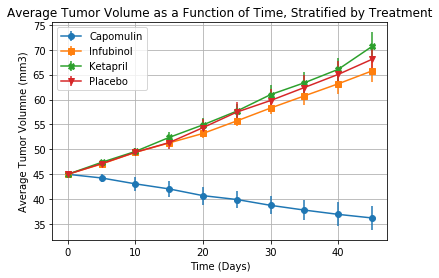

In [13]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_volume_mean_wide['Timepoint'], 
             tumor_volume_mean_wide['Capomulin'], 
             marker = "o", 
             yerr = 1.96 * tumor_volume_sem_wide['Capomulin'])

plt.errorbar(tumor_volume_mean_wide['Timepoint'], 
             tumor_volume_mean_wide['Infubinol'], 
             marker = "s", 
             yerr = 1.96 * tumor_volume_sem_wide['Infubinol'])

plt.errorbar(tumor_volume_mean_wide['Timepoint'], 
             tumor_volume_mean_wide['Ketapril'] , 
             marker = "X", 
             yerr = 1.96 * tumor_volume_sem_wide['Ketapril'])

plt.errorbar(tumor_volume_mean_wide['Timepoint'], 
             tumor_volume_mean_wide['Placebo']  , 
             marker = "v", 
             yerr = 1.96 * tumor_volume_sem_wide['Placebo'])

plt.grid(True)
plt.legend(loc = 'upper left')
plt.title("Average Tumor Volume as a Function of Time, Stratified by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Average Tumor Volumne (mm3)")
# Save the Figure
plt.show()

## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean = mise_drugs_trial.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"].reset_index()

# Preview DataFrame
met_site_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem = mise_drugs_trial.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"].reset_index()

# Preview DataFrame
met_site_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
# Minor Data Munging to Re-Format the Data Frames
met_site_mean_wide = met_site_mean.pivot(index = 'Timepoint', 
                                         columns = 'Drug', 
                                         values = 'Metastatic Sites').reset_index()

# Preview that Reformatting worked
met_site_mean_wide.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [17]:
# Minor Data Munging to Re-Format the Data Frames
met_site_sem_wide = met_site_sem.pivot(index = 'Timepoint', 
                                       columns = 'Drug', 
                                       values = 'Metastatic Sites').reset_index()

# Preview that Reformatting worked
met_site_sem_wide.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


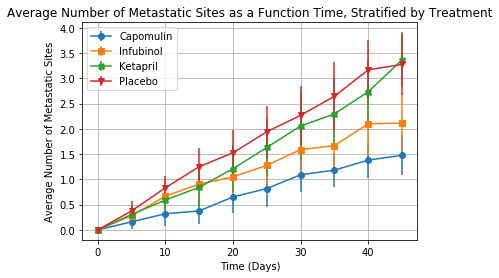

In [18]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_site_mean_wide['Timepoint'], 
             met_site_mean_wide['Capomulin'], 
             marker = "o", 
             yerr = 1.96 * met_site_sem_wide['Capomulin'])

plt.errorbar(met_site_mean_wide['Timepoint'], 
             met_site_mean_wide['Infubinol'], 
             marker = "s", 
             yerr = 1.96 * met_site_sem_wide['Infubinol'])

plt.errorbar(met_site_mean_wide['Timepoint'], 
             met_site_mean_wide['Ketapril'] , 
             marker = "X", 
             yerr = 1.96 * met_site_sem_wide['Ketapril'])

plt.errorbar(met_site_mean_wide['Timepoint'], 
             met_site_mean_wide['Placebo']  , 
             marker = "v", 
             yerr = 1.96 * met_site_sem_wide['Placebo'])

plt.grid(True)
plt.legend(loc = 'upper left')
plt.title("Average Number of Metastatic Sites as a Function Time, Stratified by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Average Number of Metastatic Sites")
# Save the Figure
plt.show()

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mise_count = mise_drugs_trial.groupby(["Drug", "Timepoint"]).count().reset_index()[["Drug", "Timepoint", "Mouse ID"]]
mise_count.rename(columns={'Mouse ID':'Count'}, inplace = True)

# Preview DataFrame
mise_count.head()


,Drug,Timepoint,Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
mise_count_wide = mise_count.pivot(index = 'Timepoint', 
                                   columns = 'Drug', 
                                   values = 'Count')

# Preview the Data Frame
mise_count_wide.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [21]:
mise_count_wide_perc = mise_count_wide.div(mise_count_wide.loc[0, :])
mise_count_wide_perc = mise_count_wide_perc * 100
mise_count_wide_perc = mise_count_wide_perc.reset_index()
mise_count_wide_perc.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


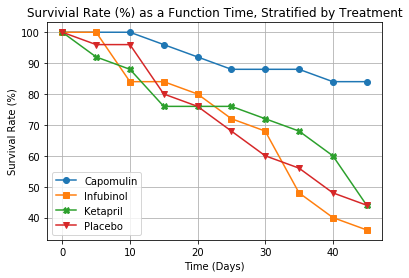

In [22]:
# Generate the Plot (Accounting for percentages)
plt.plot(mise_count_wide_perc['Timepoint'], 
         mise_count_wide_perc['Capomulin'], 
         marker = "o")

plt.plot(mise_count_wide_perc['Timepoint'], 
         mise_count_wide_perc['Infubinol'], 
         marker = "s")

plt.plot(mise_count_wide_perc['Timepoint'], 
         mise_count_wide_perc['Ketapril'] , 
         marker = "X")

plt.plot(mise_count_wide_perc['Timepoint'], 
         mise_count_wide_perc['Placebo']  , 
         marker = "v")

plt.grid(True)
plt.legend(loc = 'lower left')
plt.title("Survivial Rate (%) as a Function Time, Stratified by Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
# Save the Figure
plt.show()
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
initial_value = tumor_volume_mean_wide.set_index("Timepoint").loc[0, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
last_value = tumor_volume_mean_wide.set_index("Timepoint").loc[45, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]] 
per_change = round((last_value - initial_value) * 100 / initial_value, 2).to_frame().reset_index()
per_change.rename(columns={0:'% Change'}, inplace = True)
per_change


,Drug,% Change
0,Capomulin,-19.48
1,Infubinol,46.12
2,Ketapril,57.03
3,Placebo,51.30


Text(0, 0.5, '%')

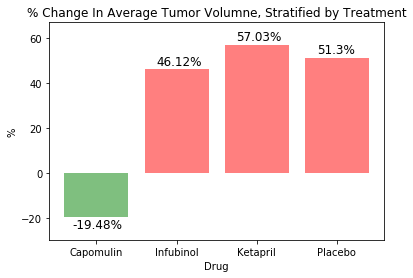

In [24]:
# Store all Relevant Percent Changes into a Tuple
colors   = ['red' if (x > 0) else 'green' for x in per_change["% Change"]]
position = np.arange(len(colors))
label = per_change["% Change"]
plt.bar(position, per_change["% Change"], align='center', alpha=0.5, color = colors)
plt.ylim(label.min() - 10, label.max() + 10)
plt.xticks(position, per_change["Drug"])

for i in range(len(position)):
    if label[i] < 0:
        plt.text(x = position[i] - 0.30, y = label[i] - 5, s = str(label[i]) + "%", size = 12)
    else:
        plt.text(x = position[i] - 0.25, y = label[i] + 2, s = str(label[i]) + "%", size = 12)

plt.title("% Change In Average Tumor Volumne, Stratified by Treatment")
plt.xlabel("Drug")
plt.ylabel("%")
